In [30]:
# Manual Tenserflow-esque operation classes
# Input nodes, output nodes and compute (which overwrites the Operation Compute)
import numpy as np

In [50]:
# Operation Class
class Operation():
    
    def __init__(self, input_nodes =[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for nodes in input_nodes:
            nodes.output_nodes.append(self)
        _default_graph.operations.append(self)
    
    def compute(self):
        pass       

In [51]:
# Operations: adding
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [52]:
# Operations: multiplication
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

In [53]:
# Operations: matrix multiplication
class matmultiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

In [54]:
# Tensorflow-esque placeholders, graphs and variable classes
# Placeholder -> empty node that gets updated
# Variable -> changeable parameter of a graph (weights of NN)
# Graph -> global var that connects variables and placeholders to operations 

In [55]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)

In [56]:
class Variable():
    
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)

In [57]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.variables = []
        self.placeholders = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

In [58]:
# Simple example: z = Ax + b; A = 5, b = 2
# z = 5x + 2


# x is placeholder! A,b are variables, z is output

In [59]:
f = Graph()

In [60]:
f.set_as_default()

In [61]:
A = Variable(5)
b = Variable(2)
x = Placeholder()

In [62]:
y = multiply(A,x)
z = add(y,b)

In [63]:
# Need to execute all operations in correct order in a Session and PostOrder Tree Traversal

In [64]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [65]:
class Session():
    
    def run(self,operation,feed_dict={}):
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else: # Operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs) # Dont know size, so use *
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [66]:
session = Session()

In [71]:
# Set x = 10
result = session.run(operation = z, feed_dict = {x:10})

In [72]:
result

52

In [77]:
# Using with matrix multiplication

f = Graph()
f.set_as_default()
A = Variable([[1,2,3],[4,5,6],[7,8,9]])
b = Variable([[2,5,9]])

x = Placeholder()
y = matmultiply(A,x)
z = add(y,b)

In [78]:
session = Session()
# Set x = 10
result = session.run(operation = z, feed_dict = {x:10})

In [79]:
result

array([[12, 25, 39],
       [42, 55, 69],
       [72, 85, 99]])

In [80]:
# Manual Classification

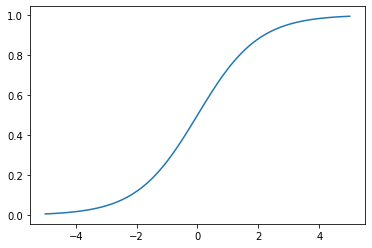

In [85]:
# Activation function

import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1 + np.exp(-z))

sample_z = np.linspace(-5,5,100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z,sample_a)

In [124]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
        
    def compute(self,z_value):
        return 1/(1 + np.exp(-z_value))

In [125]:
# Making dataset from sklearn

from sklearn.datasets import make_blobs

In [126]:
data = make_blobs(n_samples=100,
    n_features=2,
    centers=2,
    random_state = 75)

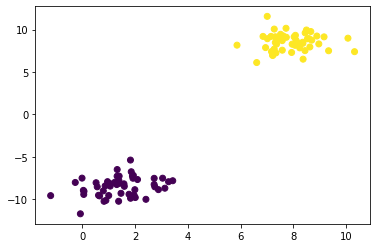

In [127]:
# Checking out made up data

features = data[0]
labels = data[1]

plt.scatter(features[:,0], features[:,1], c = labels)

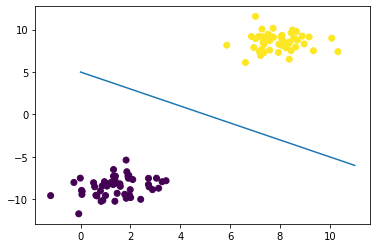

In [128]:
# Manual separation

x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0], features[:,1], c = labels)
plt.plot(x,y)

In [129]:
# x and y are both features so:
# y = mx + b
# Feature2 = m*Feature1 + b
# FeatureMatrix[1,1] - b = 0

In [130]:
# Yellow group

np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [131]:
# Purple group

np.array([1,1]).dot(np.array([[0],[-10]])) - 5

array([-15])

In [132]:
# Doing the classification - if +ve: yellow. -ve: purple

f = Graph()
f.set_as_default()
x = Placeholder()
w = Variable([1,1])
b = Variable(-5)

z = add(matmultiply(w,x),b)

a = Sigmoid(z) # activation -> 0 or 1

In [134]:
session = Session()
session.run(operation = a, feed_dict={x:[8,10]})

0.999997739675702